In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv("/content/city_day.csv")

df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [ ]:
# Explore

df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


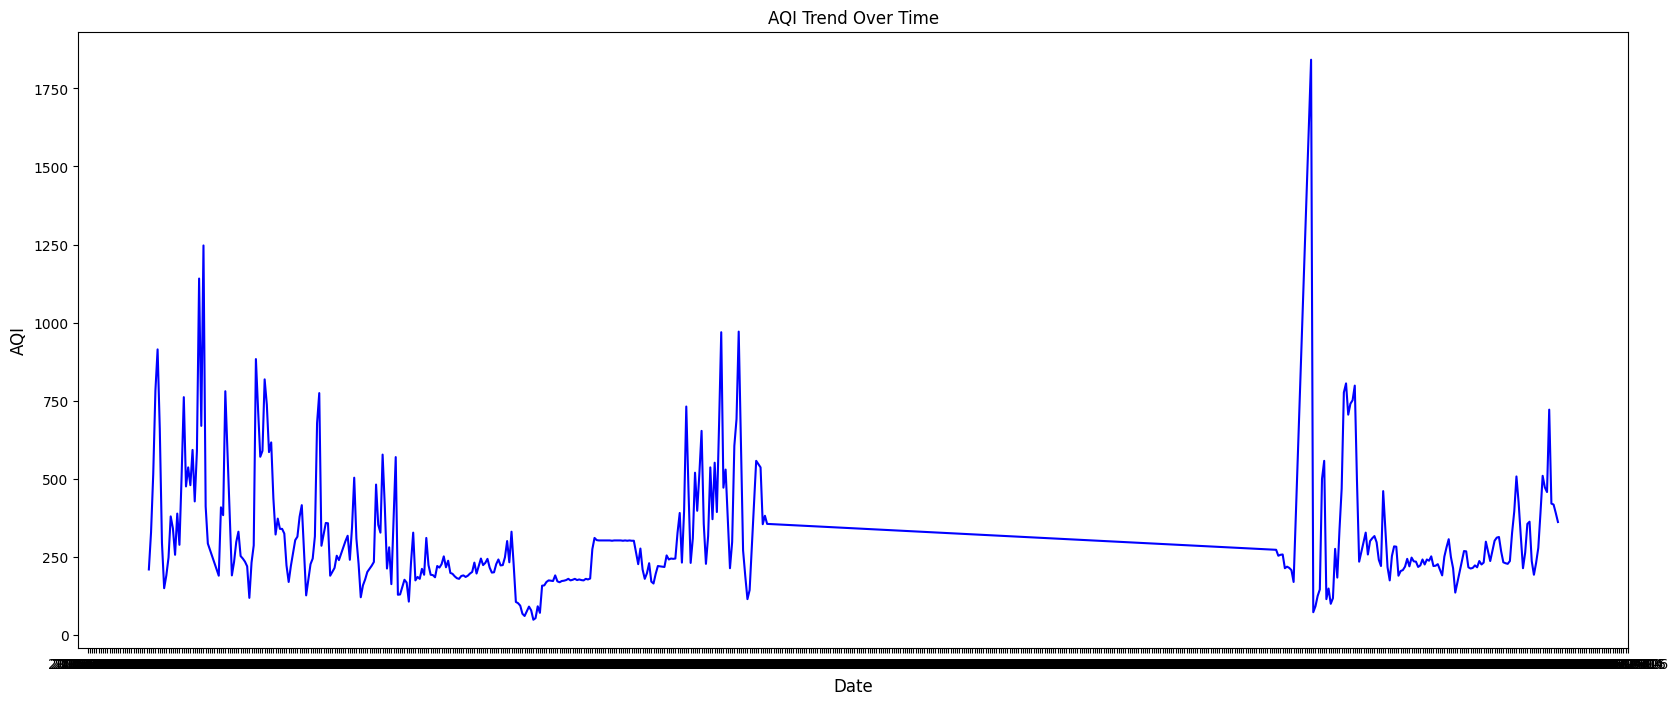

In [ ]:
# 4. Line plot

import matplotlib.pyplot as plt
import seaborn as sns

# ploting only first 1000 values
subset_df = df.iloc[:1000]

plt.figure(figsize=(20, 8))
sns.lineplot(x = 'Date', y = 'AQI', data = subset_df, color = 'b')
plt.title('AQI Trend Over Time')
plt.xlabel('Date', fontsize=12)
plt.ylabel('AQI', fontsize=12)
plt.show()


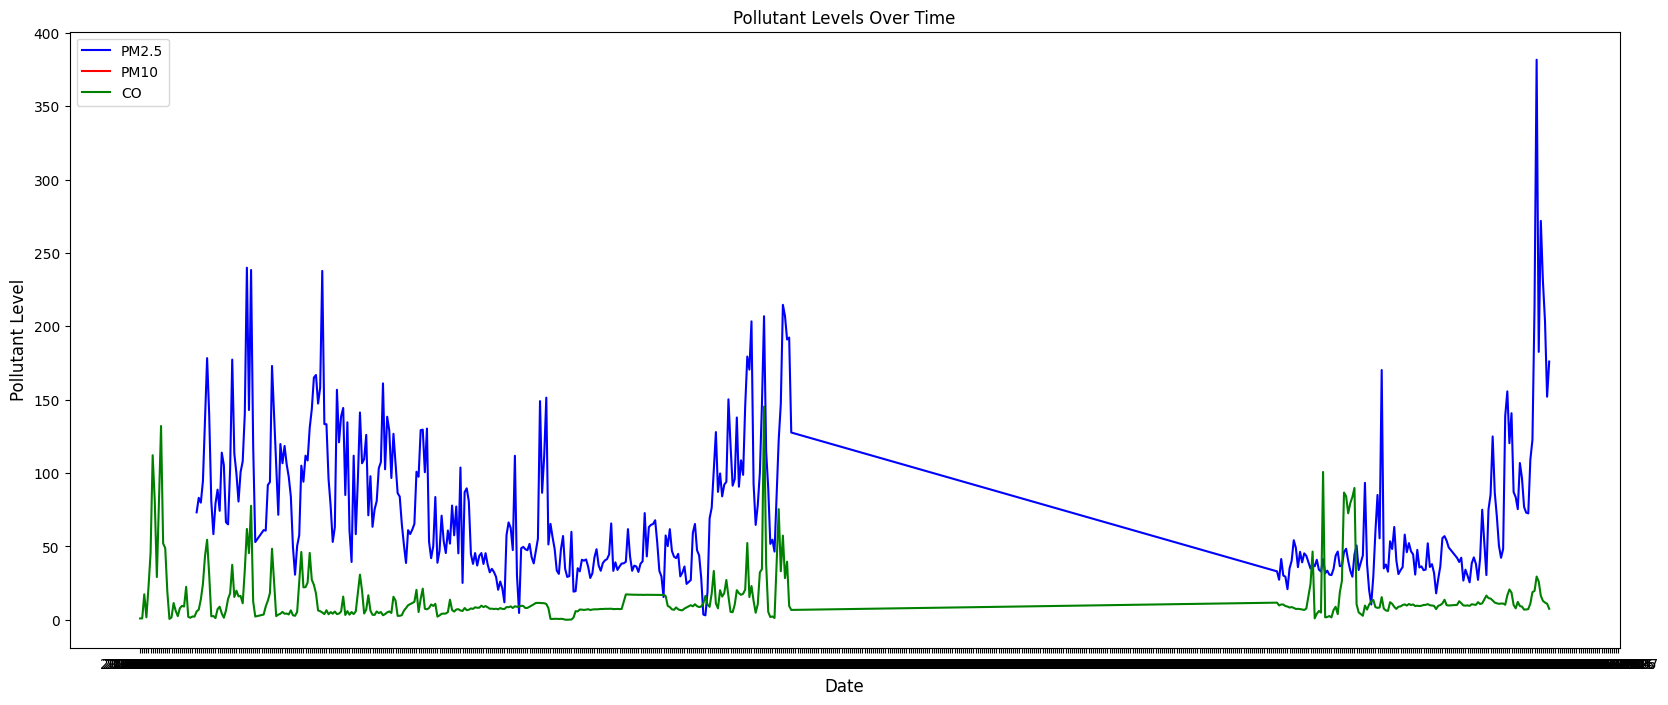

In [ ]:
# 5. Plot individual pollutant levels

subset_df = df.iloc[:1000]

plt.figure(figsize=(20, 8))

sns.lineplot(x = 'Date', y = 'PM2.5', data = subset_df, color = 'b', label = 'PM2.5')
sns.lineplot(x = 'Date', y = 'PM10', data = subset_df, color = 'r', label = 'PM10')
sns.lineplot(x = 'Date', y = 'CO', data = subset_df, color = 'g', label = 'CO')

plt.title('Pollutant Levels Over Time')
# plt.xticks(rotation=45)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Pollutant Level', fontsize=12)
plt.legend()
plt.show()

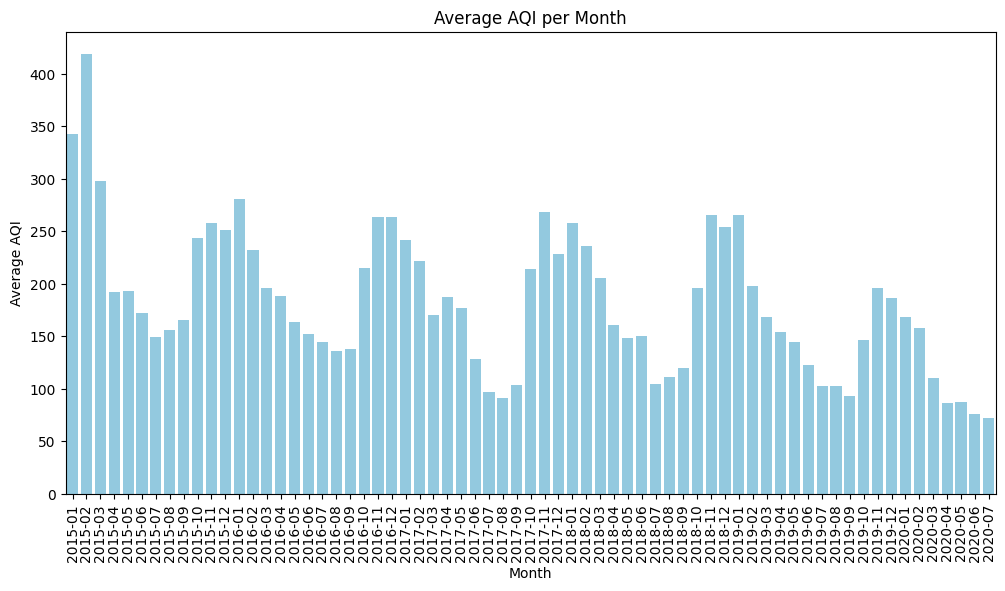

In [ ]:
# 6. Bar Plots to Compare AQI Values Across Dates

df['Month'] = pd.to_datetime(df['Date']).dt.to_period('M')
monthly_aqi = df.groupby('Month')['AQI'].mean().reset_index()

plt.figure(figsize=(20, 8))
sns.barplot(x='Month', y='AQI', data=monthly_aqi, color='skyblue')
plt.xlabel('Month')
plt.ylabel('Average AQI')
plt.title('Average AQI per Month')
plt.xticks(rotation=90)
plt.show()

# plt.figure(figsize=(12, 6))
# df['Month'] = pd.to_datetime(df['Date']).dt.to_period('M')
# monthly_aqi = df.groupby('Month')['AQI'].mean()
# monthly_aqi.plot(kind='bar', color='skyblue')
# plt.xlabel('Month')
# plt.ylabel('Average AQI')
# plt.title('Average AQI per Month')
# plt.show()


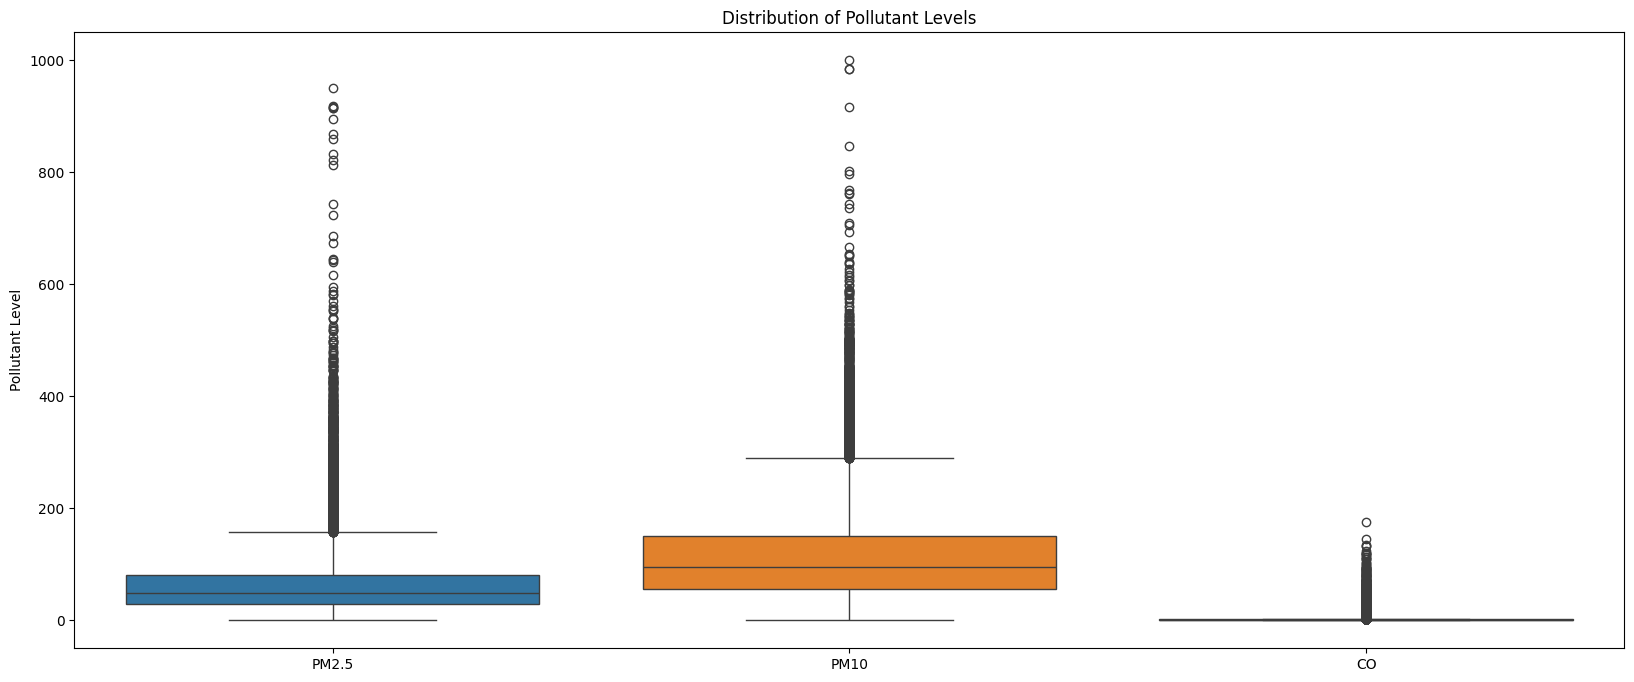

In [ ]:
# 7. Creating Box Plots to Analyze AQI Distribution

plt.figure(figsize=(20, 8))
sns.boxplot(data=df[['PM2.5', 'PM10', 'CO']])
plt.title('Distribution of Pollutant Levels')
plt.ylabel('Pollutant Level')
plt.show()


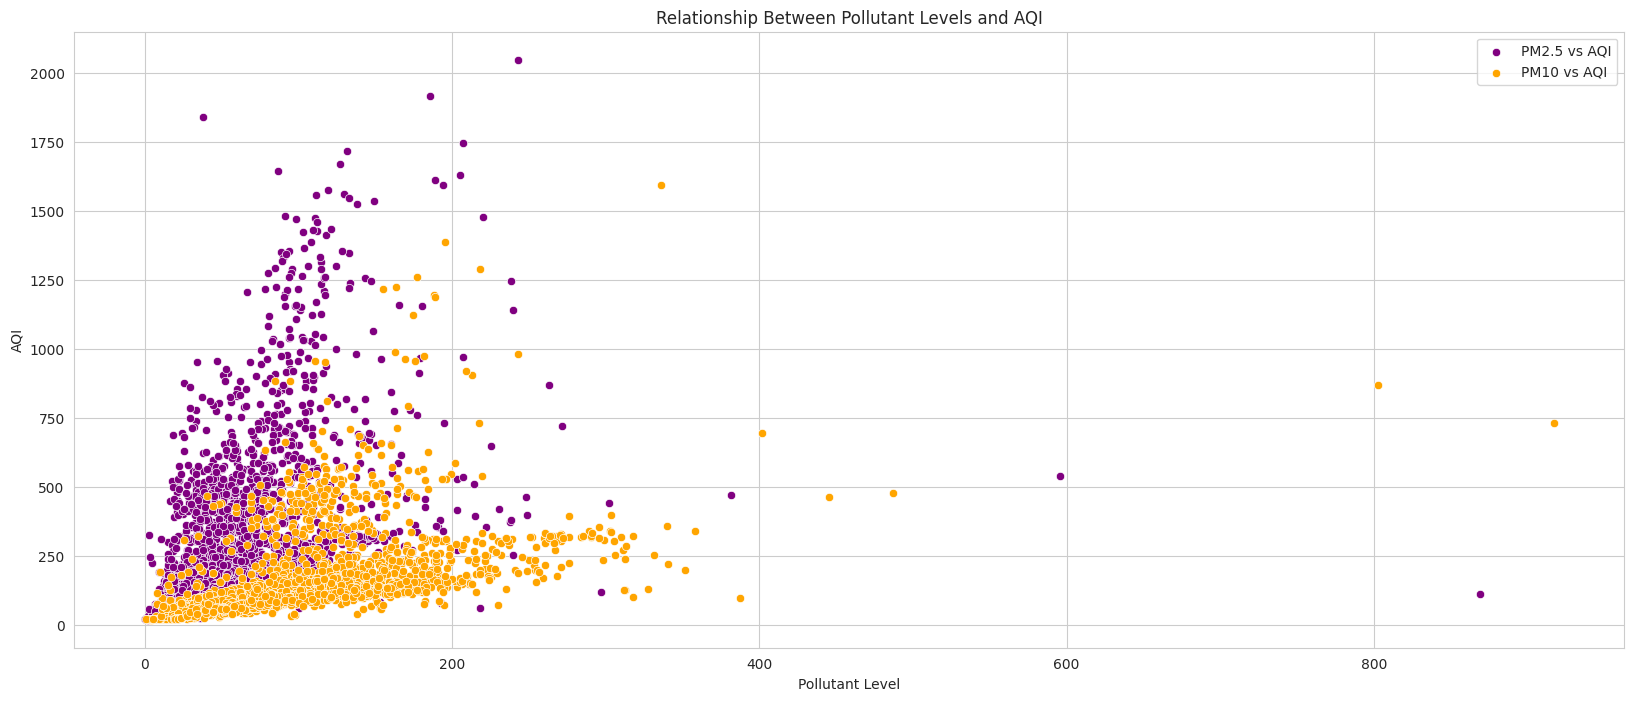

In [ ]:
sns.set_style("whitegrid")

# 8. Scatter Plots to Explore AQI and Pollutant Relationships

subset_df = df.iloc[:5000]

plt.figure(figsize=(20, 8))
sns.scatterplot(x='PM2.5', y='AQI', data=subset_df, color='purple', label='PM2.5 vs AQI')
sns.scatterplot(x='PM10', y='AQI', data=subset_df, color='orange', label='PM10 vs AQI')
plt.xlabel('Pollutant Level')
plt.ylabel('AQI')
plt.title('Relationship Between Pollutant Levels and AQI')
plt.legend()
plt.show()


In [ ]:
# 9. Customizing Visualizations

sns.set_style("whitegrid")  # Set a grid style for all plots
plt.figure(figsize=(12, 6)) # Set default figure size


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>